## Description

This implementation takes the LaFleur data, feeds it into a CNN that mimics Van Brempt's ProD model, which adds another layer for the second, main CNN.

In [1]:
import CNN_4_0 as parent

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
name = 'CNN_4_0'

In [3]:
file_path = '../Data/LaFleur_stacking_data.csv'

df = parent.load_and_preprocess_data(file_path)

In [4]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [5]:
ProD_pred = parent.load_and_predict('CNN_4_0_Pred_ProD', X)
ProD_pred = parent.reshape_model_input(ProD_pred)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
X = parent.concatenate_inputs(X, ProD_pred)

In [8]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0174 - val_loss: 0.0082
Epoch 2/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 3/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 4/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0074 - val_loss: 0.0068
Epoch 5/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 6/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 7/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 8/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 9/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 10/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 11/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 12/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


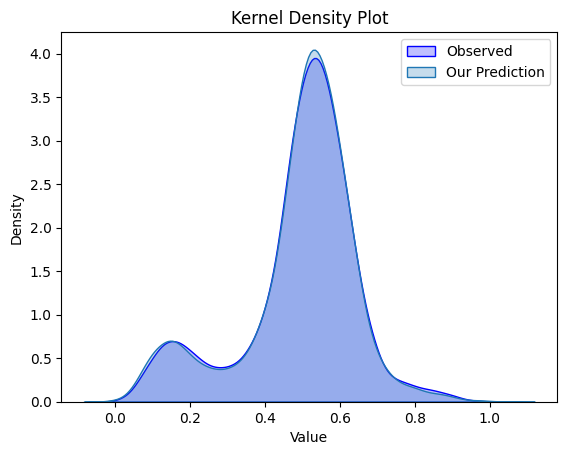

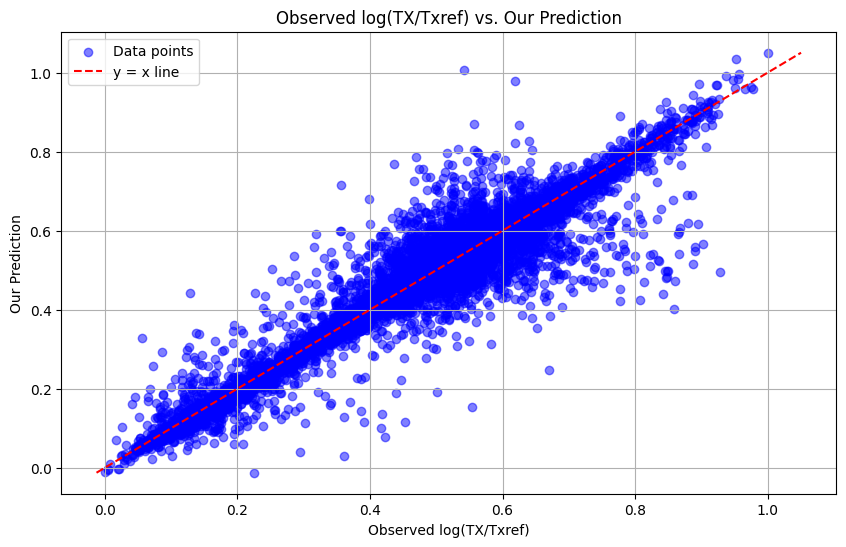

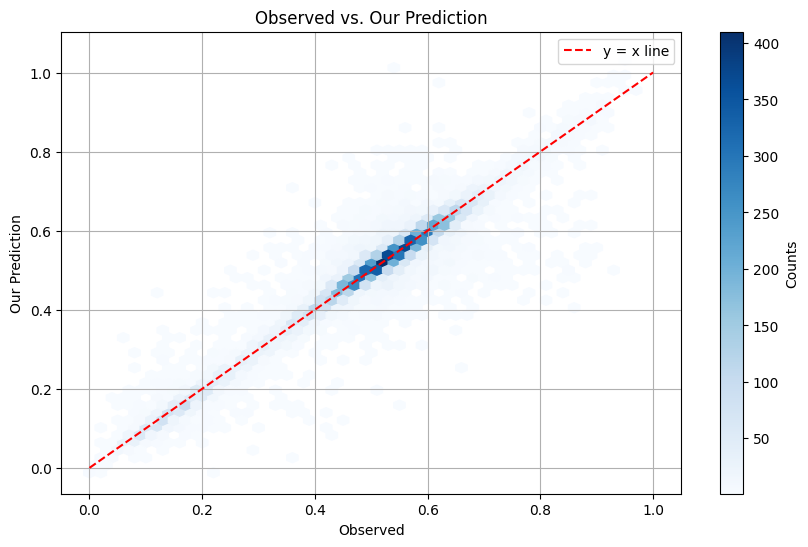

In [10]:
predicted = parent.load_and_predict(name, X)
observed = df['Normalized Observed'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [11]:
loss

0.009876549243927002